# Challenge 4: Predictive Maintenance for Industrial Machines
- **Challenge**: Create a predictive maintenance model to anticipate machinery failures.
- **Deliverables**: A Jupyter Notebook with data exploration, feature selection, predictive modeling, and validation. A presentation summarizing the approach, the model's predictive performance, and maintenance recommendations.
- **Data Source**: *Predictive Maintenance dataset* from Microsoft.

# 1. Obtain the Dataset
The dataset simulates logging of a manufacturing machine's parameters as a function of time, which is common in industrial settings. It consists of 10,000 data points stored as rows with features as columns. 

You can download this dataset from https://synapseaisolutionsa.blob.core.windows.net/public/MachineFaultDetection/predictive_maintenance.csv

In [2]:
# hint: install Pyarrow library with "pip" to avoid the deprecation warning
import pandas as pd

# read the CSV file using pandas library to create a new dataframe (df)
df = pd.read_csv("predictive_maintenance.csv")

# duplicate the df to avoid the warning "A value is trying to be set on a copy of a slice from a DataFrame."
df = df.copy()

# print dataframe shape
print (df.shape)

#show top 10 data
df.head(10)

(10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


# 2. Data Cleaning
Before we can use the data, we need to preprocess it. This typically involves handling missing values, encoding categorical variables, and creating the RFM features.

In [2]:
# Check the columns data types. Are they all correct?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [3]:
# Data exploration: how many "Null" rows do we have? And Where?
pd.set_option('display.max_rows', None) # needed to display all columns
df.isnull().sum().sort_values(ascending=False)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# 3. Data Exploration
Here are some suggested metrics to visualize:
- 3.1) Summary Statistics
- 3.2) Histogram: Show the Distribution of Target Variable
- 3.3) Time Series Analysis: plot the number of purchases over time (e.g., daily, weekly, or monthly)
- 3.4) Word cloud: use the "itemDescription" column to visualize the most commonly occurring words

In [4]:
# 3.1) Summary Statistics:  
# - Calculate basic summary statistics such as mean, median, mode, standard deviation, etc., for the numerical columns 
# Air temperature [K], Rotational speed [rpm] and Torque [Nm]

# - Compute summary statistics like count, unique items, top item, and frequency for the categorical columns 
# "Product ID" and "Type".

# Provide the number of elements for each different Type

import pandas as pd
  
# Numerical columns  
numerical_cols = ["Air temperature [K]", "Rotational speed [rpm]", "Torque [Nm]"]  
  
# Calculate summary statistics for numerical columns  
numerical_stats = df[numerical_cols].describe()  
  
# Categorical columns  
categorical_cols = ["Product ID", "Type"]  
  
# Compute summary statistics for categorical columns  
categorical_stats = df[categorical_cols].describe()


# Count the number of elements for each different "Type"  
type_counts = df['Type'].value_counts()  
  
# Print the summary statistics  
print(f"Summary Statistics for Numerical Columns:\n{numerical_stats}\n")
print(f"Summary Statistics for Categorical Columns:\n{categorical_stats}\n")
print(f"Type counts:\n{type_counts}")

Summary Statistics for Numerical Columns:
       Air temperature [K]  Rotational speed [rpm]   Torque [Nm]
count         10000.000000            10000.000000  10000.000000
mean            300.004930             1538.776100     39.986910
std               2.000259              179.284096      9.968934
min             295.300000             1168.000000      3.800000
25%             298.300000             1423.000000     33.200000
50%             300.100000             1503.000000     40.100000
75%             301.500000             1612.000000     46.800000
max             304.500000             2886.000000     76.600000

Summary Statistics for Categorical Columns:
       Product ID   Type
count       10000  10000
unique      10000      3
top        M14860      L
freq            1   6000

Type counts:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


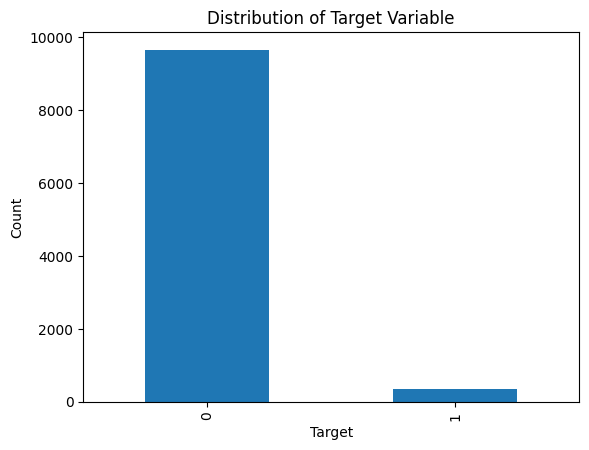

In [5]:
# 3.2) Distribution of Target Variable: Create a histogram or bar plot  
# to visualize the distribution of the target variable "Target". 
# This will give you an overview of the proportion of machinery failures in the dataset.

import pandas as pd  
import matplotlib.pyplot as plt    
  
# Plot the distribution of the target variable
df['Target'].value_counts().plot(kind='bar')  
plt.title('Distribution of Target Variable')  
plt.xlabel('Target')  
plt.ylabel('Count')  
plt.show()

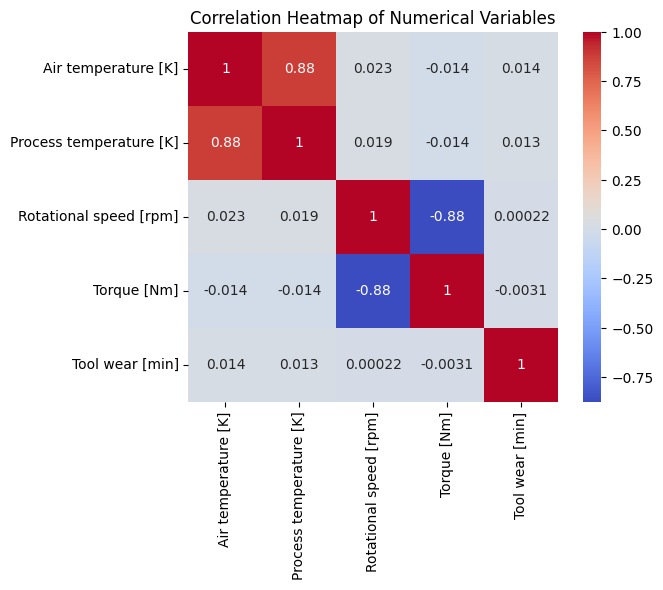

In [6]:
# 3.3) Correlation Heatmap: Generate a correlation heatmap to visualize the relationships between different  
# numerical variables (e.g., "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", 
# "Torque [Nm]", "Tool wear [min]"). 
# This will help you identify any significant correlations between variables, which can be useful for feature selection. 

import pandas as pd
import seaborn as sns  # requires pip install seaborn
import matplotlib.pyplot as plt
  
# Select the numerical variables for correlation analysis
numerical_vars = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",  
                  "Torque [Nm]", "Tool wear [min]"]
  
# Compute the correlation matrix
correlation_matrix = df[numerical_vars].corr()
  
# Generate the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

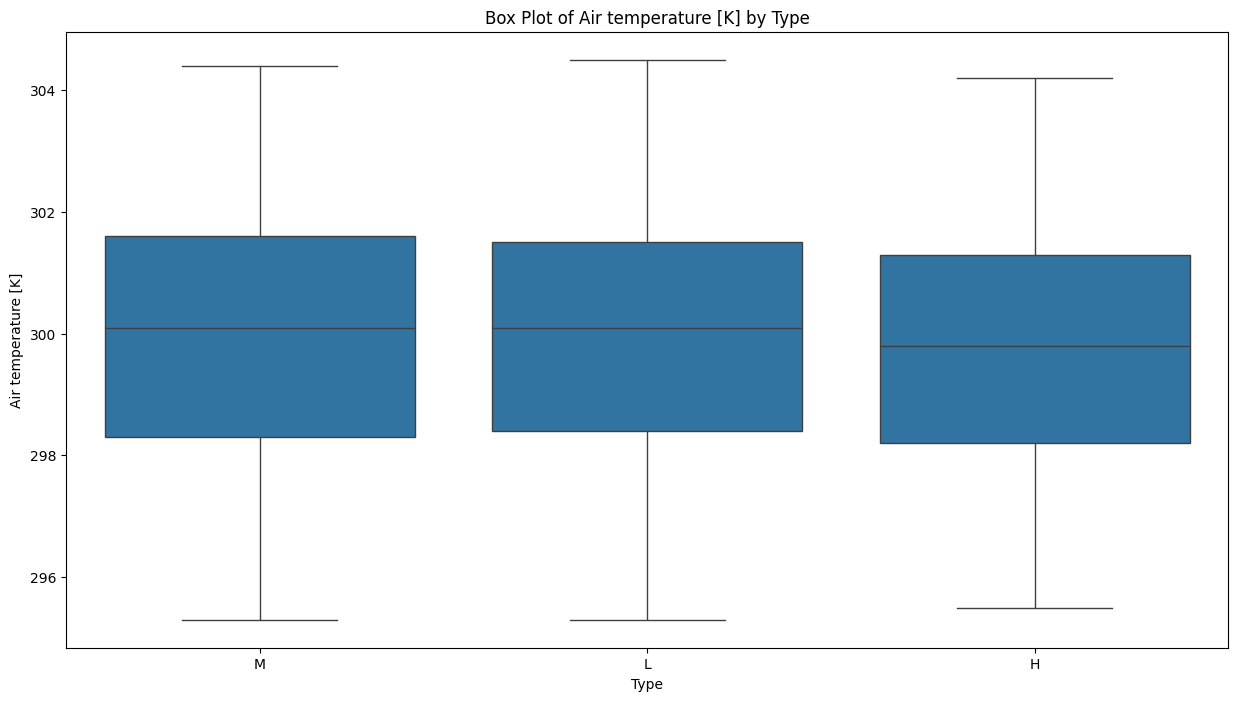

<Figure size 1500x800 with 0 Axes>

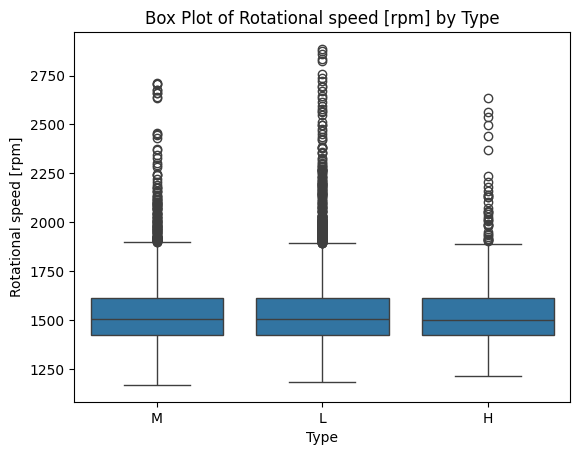

<Figure size 1500x800 with 0 Axes>

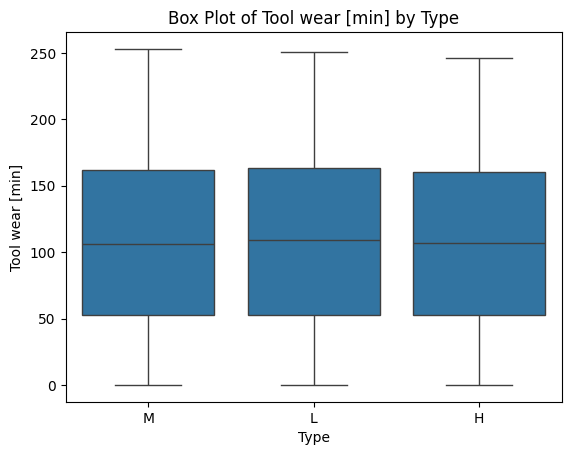

<Figure size 1500x800 with 0 Axes>

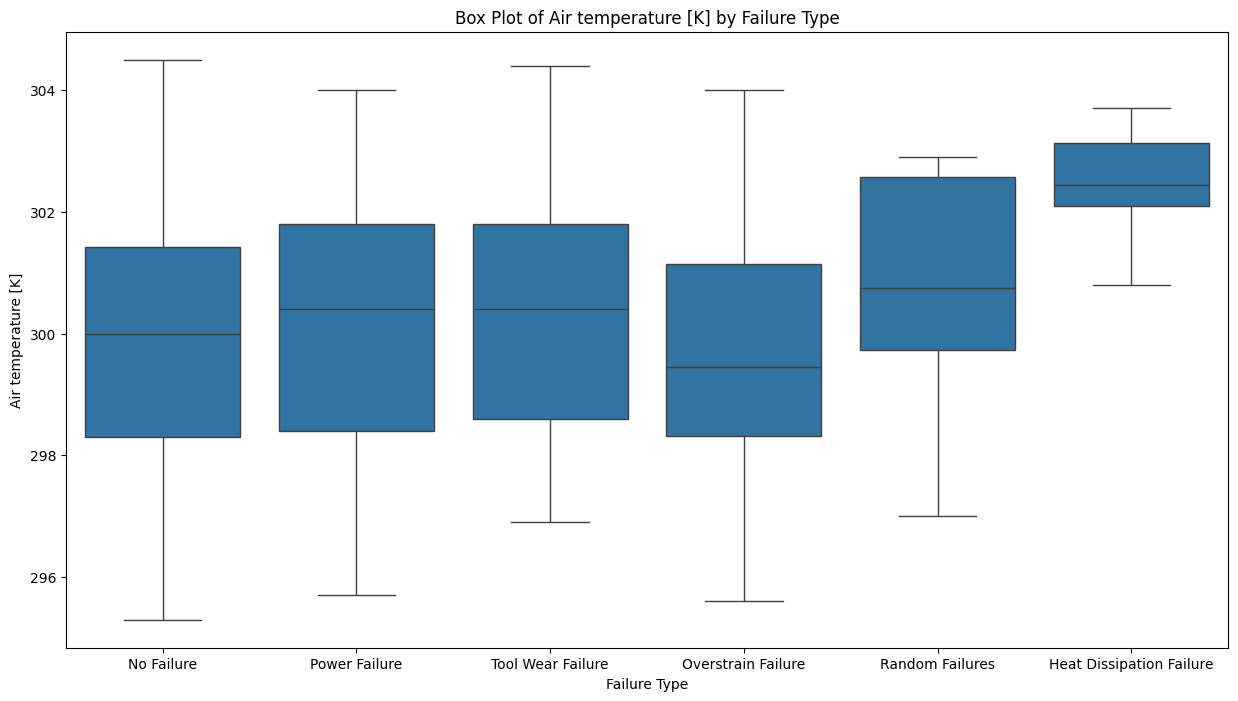

<Figure size 1500x800 with 0 Axes>

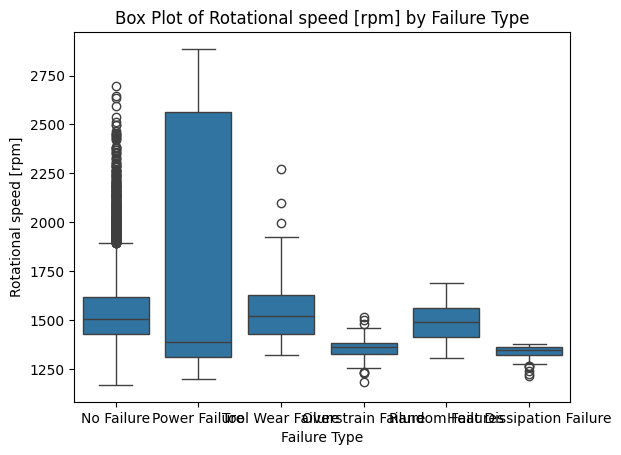

<Figure size 1500x800 with 0 Axes>

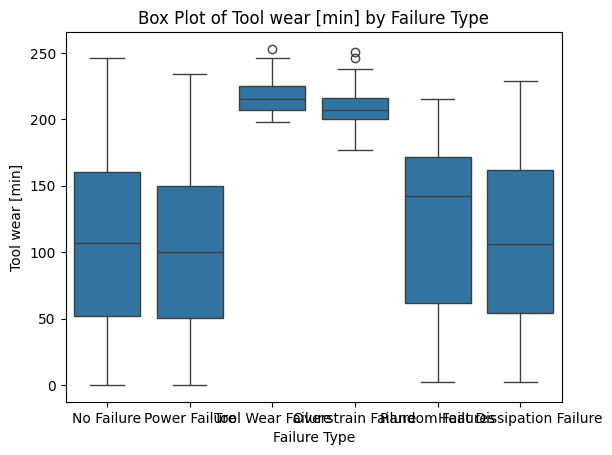

<Figure size 1500x800 with 0 Axes>

In [7]:
# 4) Box Plots: Create box plots to visualize the distribution of numerical variables 
# (e.g., "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", 
# "Tool wear [min]") for different categories of the categorical variables (e.g., "Type", "Failure Type"). 
# This can provide insights into how different factors affect machinery failures.

# This code will load the dataset and create separate box plots for each numerical variable, grouped by each categorical 
# variable. The x-axis represents the categorical variable, and the y-axis represents the numerical variable. 
# Each box plot shows the distribution of the numerical variable for different categories of the categorical variable. 
# This visualization will provide insights into how different factors, such as the type of machinery or failure type, affect the distribution of numerical variables and potentially impact machinery failures.

import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
  
# Select the numerical and categorical variables for box plots  
numerical_vars = ["Air temperature [K]", "Rotational speed [rpm]", "Tool wear [min]"]  
categorical_vars = ["Type", "Failure Type"]  
  
# Create box plots for numerical variables grouped by categorical variables  
for cat_var in categorical_vars:  
    plt.figure(figsize=(15, 8))  
    for num_var in numerical_vars:  
        sns.boxplot(x=cat_var, y=num_var, data=df)  
        plt.title(f'Box Plot of {num_var} by {cat_var}')  
        plt.xlabel(cat_var)  
        plt.ylabel(num_var)
        plt.figure(figsize=(15, 8))  
        plt.show()

## 4. Building Classification Machine Learning Model
- 4.1 Create and fill two variables: features and label
- 4.2 Training and Test Dataset Split
- 4.3 Use the Random Forest classifier Algorithm to Build the Model

In [3]:
# 4.1 Create and fill two variables: features and label  
# features: "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]" 
# label = "Target"  # Assuming "Target" is the binary classification target variable

features = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
label = "Target"

In [4]:
# 4.2 Training and Test Dataset Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

[d.shape for d in (X_train, X_test, y_train, y_test)]

[(8000, 5), (2000, 5), (8000,), (2000,)]

In [5]:
# 4.3 Use the Random Forest classifier Algorithm to Build the Model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
  
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

## 5. Score the Model

In [6]:
# Make predictions on the test set  
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## 6. Evaluate the Model 

In [7]:
# Evaluate the model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.983


In [12]:
# Nuovi dati da predire
new_data = pd.DataFrame({
    "Air temperature [K]": [1000],
    "Process temperature [K]": [280],
    "Rotational speed [rpm]": [1400],
    "Torque [Nm]": [30],
    "Tool wear [min]": [5]
})

# Fai le previsioni sui nuovi dati
new_data_prediction = model.predict(new_data)

# Stampa le previsioni
print(new_data_prediction)

[0]
